In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install pygad
!pip install mplcyberpunk
import pygad



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 2.1 MB/s eta 0:00:00


## Exemplos

In [ ]:
import pygad
import numpy

"""
Given the following function:
    y = f(w1:w6) = w1x1 + w2x2 + w3x3 + w4x4 + w5x5 + 6wx6
    where (x1,x2,x3,x4,x5,x6)=(4,-2,3.5,5,-11,-4.7) and y=44
What are the best values for the 6 weights (w1 to w6)? We are going to use the genetic algorithm to optimize this function.
"""

function_inputs = [4,-2,3.5,5,-11,-4.7] # Function inputs.
desired_output = 44 # Function output.

def fitness_func(ga_instance, solution, solution_idx):
    output = numpy.sum(solution*function_inputs)
    fitness = 1.0 / (numpy.abs(output - desired_output) + 0.000001)
    return fitness

num_generations = 100 # Number of generations.
num_parents_mating = 10 # Number of solutions to be selected as parents in the mating pool.

sol_per_pop = 20 # Number of solutions in the population.
num_genes = len(function_inputs)

last_fitness = 0
def on_generation(ga_instance):
    global last_fitness
    print(f"Generation = {ga_instance.generations_completed}")
    print(f"Fitness    = {ga_instance.best_solution(pop_fitness=ga_instance.last_generation_fitness)[1]}")
    print(f"Change     = {ga_instance.best_solution(pop_fitness=ga_instance.last_generation_fitness)[1] - last_fitness}")
    last_fitness = ga_instance.best_solution(pop_fitness=ga_instance.last_generation_fitness)[1]

ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       fitness_func=fitness_func,
                       on_generation=on_generation)

# Running the GA to optimize the parameters of the function.
ga_instance.run()

ga_instance.plot_fitness()

# Returning the details of the best solution.
solution, solution_fitness, solution_idx = ga_instance.best_solution(ga_instance.last_generation_fitness)
print(f"Parameters of the best solution : {solution}")
print(f"Fitness value of the best solution = {solution_fitness}")
print(f"Index of the best solution : {solution_idx}")

prediction = numpy.sum(numpy.array(function_inputs)*solution)
print(f"Predicted output based on the best solution : {prediction}")

if ga_instance.best_solution_generation != -1:
    print(f"Best fitness value reached after {ga_instance.best_solution_generation} generations.")

# Saving the GA instance.
filename = 'genetic' # The filename to which the instance is saved. The name is without extension.
ga_instance.save(filename=filename)

# Loading the saved GA instance.
loaded_ga_instance = pygad.load(filename=filename)
loaded_ga_instance.plot_fitness()

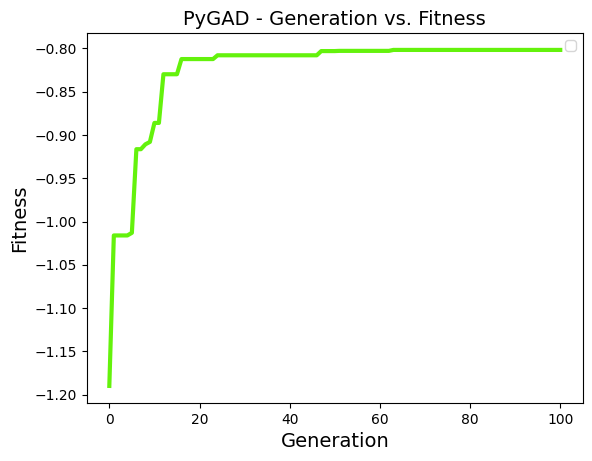

Melhor solução encontrada: x = 2.1931, y = 1.6118
Valor da função objetivo: 0.8018


In [ ]:
# Definição da função objetivo com penalização
def fitness_function(ga_instance,solution, solution_idx):
    x, y = solution
    objective = (x - 3)**2 + (y - 2)**2  # Função objetivo

    # Penalização para restrições
    penalty = 0
    if x + 2*y > 6:
        penalty += 100 * (x + 2*y - 6)  # Penaliza violações da primeira restrição
    if 2*x + y > 6:
        penalty += 100 * (2*x + y - 6)  # Penaliza violações da segunda restrição

    return - (objective + penalty)  # Negativo porque o pyGAD maximiza a função fitness

# Definições do GA
num_generations = 100
num_parents_mating = 4
sol_per_pop = 30
num_genes = 2
gene_space = [{'low': 0, 'high': 4}, {'low': 0, 'high': 4}]

last_fitness = 0
def on_generation(ga_instance):
    global last_fitness
    print(f"Generation = {ga_instance.generations_completed}")
    print(f"Fitness    = {ga_instance.best_solution(pop_fitness=ga_instance.last_generation_fitness)[1]}")
    print(f"Change     = {ga_instance.best_solution(pop_fitness=ga_instance.last_generation_fitness)[1] - last_fitness}")
    last_fitness = ga_instance.best_solution(pop_fitness=ga_instance.last_generation_fitness)[1]

ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       gene_space=gene_space)

# Executa o GA
ga_instance.run()
ga_instance.plot_fitness()


# Obtém a melhor solução
solution, solution_fitness, _ = ga_instance.best_solution()
print(f"Melhor solução encontrada: x = {solution[0]:.4f}, y = {solution[1]:.4f}")
print(f"Valor da função objetivo: {abs(solution_fitness):.4f}")


## Problema 1 - Carga distribuida

### Definicao sem repetibilidade

In [ ]:
# Definição da função objetivo com penalização
def fitness_function(ga_instance,solution, solution_idx):
    x1, x2 = solution
    objective = 76500*x1*x2  # Função objetivo

    # Penalização para restrições
    g1 = (0.9/(x1*x2**2)) - 220
    g2 = ((875.604*(10**-9))/(x1*x2**3)) - 0.02
    g3 = x1 - x2
    penalty = 0
    if g1 > 0:
        penalty += 1.5*10**8 * g1  # Penaliza violações da primeira restrição
    if g2 > 0:
        penalty += 1.5*10**8 * g2  # Penaliza violações da segunda restrição
    if g3 > 0:
        penalty += 1.5*10**8 * g3  # Penaliza violações da terceira restrição

    return -(objective + penalty)  # Negativo porque o pyGAD maximiza a função fitness

# Definições do GA
num_generations = 500
num_parents_mating = 15
sol_per_pop = 30
num_genes = 2
gene_space = [{'low': 0.04, 'high': 0.12}, {'low': 0.06, 'high': 0.2}]

last_fitness = 0
def on_generation(ga_instance):
    global last_fitness
    print(f"Generation = {ga_instance.generations_completed}")
    print(f"Fitness    = {ga_instance.best_solution(pop_fitness=ga_instance.last_generation_fitness)[1]}")
    print(f"Change     = {ga_instance.best_solution(pop_fitness=ga_instance.last_generation_fitness)[1] - last_fitness}")
    last_fitness = ga_instance.best_solution(pop_fitness=ga_instance.last_generation_fitness)[1]

ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       gene_space=gene_space)

# Executa o GA
ga_instance.run()
#ga_instance.plot_fitness()


# Obtém a melhor solução
solution, solution_fitness, _ = ga_instance.best_solution()
print(f"Melhor solução encontrada: [ {solution[0]:.4f}, {solution[1]:.4f}]")
print(f"Valor da função objetivo: {abs(solution_fitness):.4f}")

### Definicao com repitibilidade

/usr/local/lib/python3.11/dist-packages/pygad/pygad.py:724: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(



Solucao para Algoritmo Genético
Ponto Otimo: [0.1023337  0.19999883]
Melhor Solucao: 1565.6964064932722
Pior Solucao: 1584.2431725805186
Media: 1572.2529543604035
Desvio Padrao: 4.590573927503732


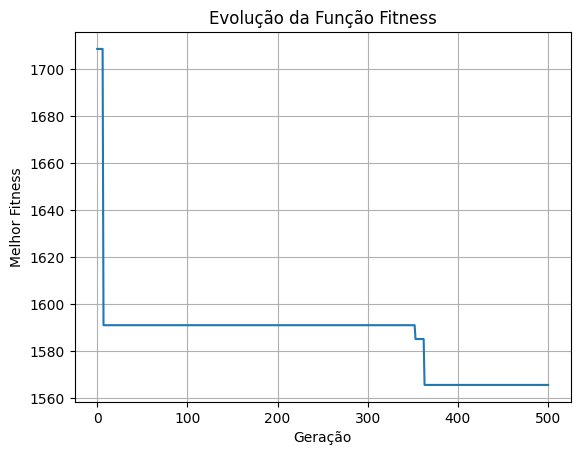

In [ ]:
# Definição da função objetivo com penalização
all_best71 = []
all_fmin71 = []
all_conv_curve71 = []

def fitness_function(ga_instance,solution, solution_idx):
      x1, x2 = solution
      objective = 76500*x1*x2  # Função objetivo

      # Penalização para restrições
      g1 = (0.9/(x1*x2**2)) - 220
      g2 = ((875.604*(10**-9))/(x1*x2**3)) - 0.02
      g3 = x1 - x2
      penalty = 0
      if g1 > 0:
          penalty += 1.5*10**8 * g1  # Penaliza violações da primeira restrição
      if g2 > 0:
          penalty += 1.5*10**8 * g2  # Penaliza violações da segunda restrição
      if g3 > 0:
          penalty += 1.5*10**8 * g3  # Penaliza violações da terceira restrição

      return -(objective + penalty)  # Negativo porque o pyGAD maximiza a função fitness

# Definições do GA
num_generations = 500
num_parents_mating = 10
sol_per_pop = 30
num_genes = 2
gene_space = [{'low': 0.04, 'high': 0.12}, {'low': 0.06, 'high': 0.2}]

for _ in range(50):
  ga_instance = pygad.GA(num_generations=num_generations,
                        num_parents_mating=num_parents_mating,
                        fitness_func=fitness_function,
                        sol_per_pop=sol_per_pop,
                        num_genes=num_genes,
                        gene_space=gene_space)

  # Executa o GA
  ga_instance.run()
  #ga_instance.plot_fitness()


  # Obtém a melhor solução
  solution, solution_fitness, _ = ga_instance.best_solution()
  fitness_values = ga_instance.best_solutions_fitness

  all_best71.append(solution)
  all_fmin71.append(solution_fitness)
  all_conv_curve71.append(fitness_values)

all_fmin71_array = np.array(all_fmin71)   #transforma em vetor
fmelhor71 = np.max(all_fmin71_array)      #pega o melhor resultado (valores negativos então tem que ser o max)
indice71 = np.argmax(all_fmin71_array)    #indice do melhor resultado
melhor_solucao71 = all_best71[indice71]   #ponto otimo da melhor solucao

fpior71 = np.min(all_fmin71_array)        #pior resultado
fmedia71 = np.mean(all_fmin71_array)      #media
fdesvpad71 = np.std(all_fmin71_array)     #desvio padrao
fitness_values71 = all_conv_curve71[indice71]  #curva da melhor solucao


print("\nSolucao para Algoritmo Genético")
print(f"Ponto Otimo: {melhor_solucao71}")
print(f"Melhor Solucao: {-1*fmelhor71}")
print(f"Pior Solucao: {-1*fpior71}")
print(f"Media: {-1*fmedia71}")
print(f"Desvio Padrao: {fdesvpad71}")

# Plota o gráfico manualmente
plt.plot(range(501),-1*np.array(fitness_values71), linestyle='-')
plt.xlabel('Geração')
plt.ylabel('Melhor Fitness')
plt.title('Evolução da Função Fitness')
plt.grid()
plt.show()

In [ ]:
np.savetxt("fitness_values71.txt", fitness_values71)

In [ ]:
fitness_values71

[-1708.4622118616296,
 -1708.4622118616296,
 -1708.4622118616296,
 -1708.4622118616296,
 -1708.4622118616296,
 -1708.4622118616296,
 -1708.4622118616296,
 -1591.0727184031043,
 -1591.0727184031043,
 -1591.0727184031043,
 -1591.0727184031043,
 -1591.0727184031043,
 -1591.0727184031043,
 -1591.0727184031043,
 -1591.0727184031043,
 -1591.0727184031043,
 -1591.0727184031043,
 -1591.0727184031043,
 -1591.0727184031043,
 -1591.0727184031043,
 -1591.0727184031043,
 -1591.0727184031043,
 -1591.0727184031043,
 -1591.0727184031043,
 -1591.0727184031043,
 -1591.0727184031043,
 -1591.0727184031043,
 -1591.0727184031043,
 -1591.0727184031043,
 -1591.0727184031043,
 -1591.0727184031043,
 -1591.0727184031043,
 -1591.0727184031043,
 -1591.0727184031043,
 -1591.0727184031043,
 -1591.0727184031043,
 -1591.0727184031043,
 -1591.0727184031043,
 -1591.0727184031043,
 -1591.0727184031043,
 -1591.0727184031043,
 -1591.0727184031043,
 -1591.0727184031043,
 -1591.0727184031043,
 -1591.0727184031043,
 -1591.072

## Problema 2 - Viga de 5 seções

/usr/local/lib/python3.11/dist-packages/pygad/pygad.py:724: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(



Solucao para Algoritmo Genético
Ponto Otimo: [5.98897432 5.35362797 4.45365123 3.56590442 2.11752326]
Melhor Solucao: 1.3403321061703426
Pior Solucao: 1.342587226949699
Media: 1.3412942684738782
Desvio Padrao: 0.0006101435208160852


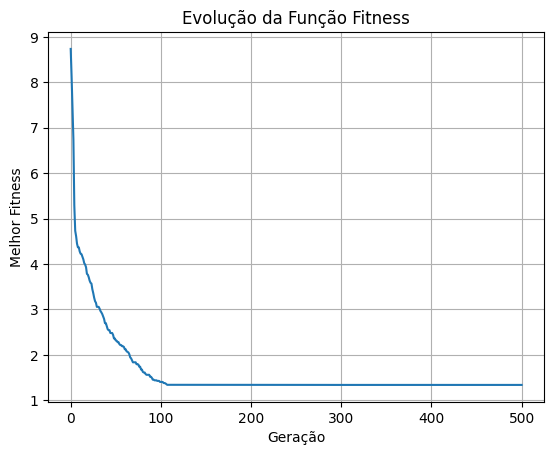

In [ ]:
all_best72 = []
all_fmin72 = []
all_conv_curve72 = []

# Definição da função objetivo com penalização
def fitness_function(ga_instance,solution, solution_idx):
    C1 = 0.0624
    C2 = 1
    x1, x2, x3, x4, x5 = solution
    objective = C1*(x1+x2+x3+x4+x5)  # Função objetivo

    # Penalização para restrições
    g1 = 61/x1**3 + 37/x2**3 + 19/x3**3 + 7/x4**3 + 1/x5**3 - C2
    penalty = 0
    if g1 > 0:
        penalty += 1000 * g1  # Penaliza violações da primeira restrição
    # if 2*x + y > 6:
    #     penalty += 100 * (2*x + y - 6)  # Penaliza violações da segunda restrição

    return -(objective + penalty)  # Negativo porque o pyGAD maximiza a função fitness

# Definições do GA
num_generations = 500
num_parents_mating = 15
sol_per_pop = 30
num_genes = 5
gene_space = [{'low': 0.01, 'high': 100}, {'low': 0.01, 'high': 100},{'low': 0.01, 'high': 100},
 {'low': 0.01, 'high': 100},{'low': 0.01, 'high': 100}]

for _ in range(50):
  ga_instance = pygad.GA(num_generations=num_generations,
                        num_parents_mating=num_parents_mating,
                        fitness_func=fitness_function,
                        sol_per_pop=sol_per_pop,
                        num_genes=num_genes,
                        gene_space=gene_space)

  # Executa o GA
  ga_instance.run()
  #ga_instance.plot_fitness()


  # Obtém a melhor solução
  solution, solution_fitness, _ = ga_instance.best_solution()
  fitness_values = ga_instance.best_solutions_fitness

  all_best72.append(solution)
  all_fmin72.append(solution_fitness)
  all_conv_curve72.append(fitness_values)

all_fmin72_array = np.array(all_fmin72)   #transforma em vetor
fmelhor72 = np.max(all_fmin72_array)      #pega o melhor resultado (valores negativos então tem que ser o max)
indice72 = np.argmax(all_fmin72_array)    #indice do melhor resultado
melhor_solucao72 = all_best72[indice72]   #ponto otimo da melhor solucao

fpior72 = np.min(all_fmin72_array)        #pior resultado
fmedia72 = np.mean(all_fmin72_array)      #media
fdesvpad72 = np.std(all_fmin72_array)     #desvio padrao
fitness_values72 = all_conv_curve72[indice72]  #curva da melhor solucao


print("\nSolucao para Algoritmo Genético")
print(f"Ponto Otimo: {melhor_solucao72}")
print(f"Melhor Solucao: {-1*fmelhor72}")
print(f"Pior Solucao: {-1*fpior72}")
print(f"Media: {-1*fmedia72}")
print(f"Desvio Padrao: {fdesvpad72}")

# Plota o gráfico manualmente
plt.plot(range(501),-1*np.array(fitness_values72), linestyle='-')
plt.xlabel('Geração')
plt.ylabel('Melhor Fitness')
plt.title('Evolução da Função Fitness')
plt.grid()
plt.show()

In [ ]:
np.savetxt("fitness_values72.txt", -1*np.array(fitness_values72))

## Problema 3 -

/usr/local/lib/python3.11/dist-packages/pygad/pygad.py:724: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(



Solucao para Algoritmo Genético
Ponto Otimo: [5.45069069 0.29287683]
Melhor Solucao: 26.57784300298114
Pior Solucao: 27.25487617995676
Media: 26.78273662097156
Desvio Padrao: 0.14163537976911486


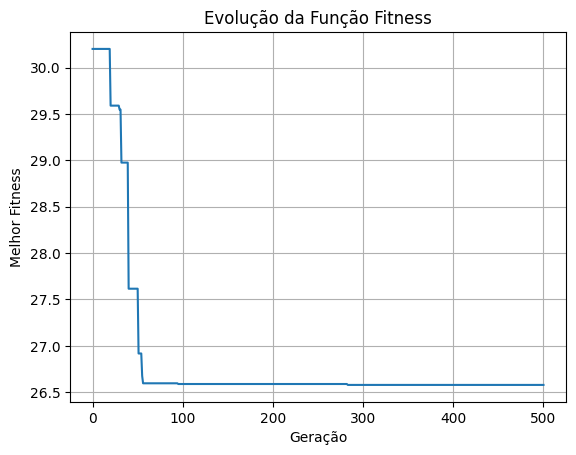

In [ ]:
all_best73 = []
all_fmin73 = []
all_conv_curve73 = []
# Definição da função objetivo com penalização
def fitness_function(ga_instance,solution, solution_idx):
    x1, x2 = solution
    objective = 9.82*x1*x2 + 2*x1  # Função objetivo

    # Penalização para restrições
    gg = 2500/(np.pi*x1*x2)
    g1 = gg - 500
    g2 = gg - ((np.pi**2)*(0.85*10**6)*(x1**2+x2**2))/(8*(250**2))
    penalty = 0
    if g1 > 0:
        penalty += 3 * g1  # Penaliza violações da primeira restrição
    if g2 > 0:
        penalty += 3 * g2  # Penaliza violações da segunda restrição

    return -(objective + penalty)  # Negativo porque o pyGAD maximiza a função fitness

# Definições do GA
num_generations = 500
num_parents_mating = 15
sol_per_pop = 30
num_genes = 2
gene_space = [{'low': 2, 'high': 14}, {'low': 0.2, 'high': 0.8}]


for _ in range(50):
  ga_instance = pygad.GA(num_generations=num_generations,
                        num_parents_mating=num_parents_mating,
                        fitness_func=fitness_function,
                        sol_per_pop=sol_per_pop,
                        num_genes=num_genes,
                        gene_space=gene_space)

# Executa o GA
  ga_instance.run()
  #ga_instance.plot_fitness()


  # Obtém a melhor solução
  solution, solution_fitness, _ = ga_instance.best_solution()
  fitness_values = ga_instance.best_solutions_fitness

  all_best73.append(solution)
  all_fmin73.append(solution_fitness)
  all_conv_curve73.append(fitness_values)

all_fmin73_array = np.array(all_fmin73)   #transforma em vetor
fmelhor73 = np.max(all_fmin73_array)      #pega o melhor resultado (valores negativos então tem que ser o max)
indice73 = np.argmax(all_fmin73_array)    #indice do melhor resultado
melhor_solucao73 = all_best73[indice73]   #ponto otimo da melhor solucao

fpior73 = np.min(all_fmin73_array)        #pior resultado
fmedia73 = np.mean(all_fmin73_array)      #media
fdesvpad73 = np.std(all_fmin73_array)     #desvio padrao
fitness_values73 = all_conv_curve73[indice73]  #curva da melhor solucao


print("\nSolucao para Algoritmo Genético")
print(f"Ponto Otimo: {melhor_solucao73}")
print(f"Melhor Solucao: {-1*fmelhor73}")
print(f"Pior Solucao: {-1*fpior73}")
print(f"Media: {-1*fmedia73}")
print(f"Desvio Padrao: {fdesvpad73}")

# Plota o gráfico manualmente
plt.plot(range(501),-1*np.array(fitness_values73), linestyle='-')
plt.xlabel('Geração')
plt.ylabel('Melhor Fitness')
plt.title('Evolução da Função Fitness')
plt.grid()
plt.show()

In [ ]:
np.savetxt("fitness_values73.txt", -1*np.array(fitness_values73))

## Problema 4

/usr/local/lib/python3.11/dist-packages/pygad/pygad.py:724: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(



Solucao para Algoritmo Genético
Ponto Otimo: [0.5        1.25211637]
Melhor Solucao: 9.390872739529575
Pior Solucao: 11.836739662168094
Media: 9.497541003179922
Desvio Padrao: 0.402811569471325


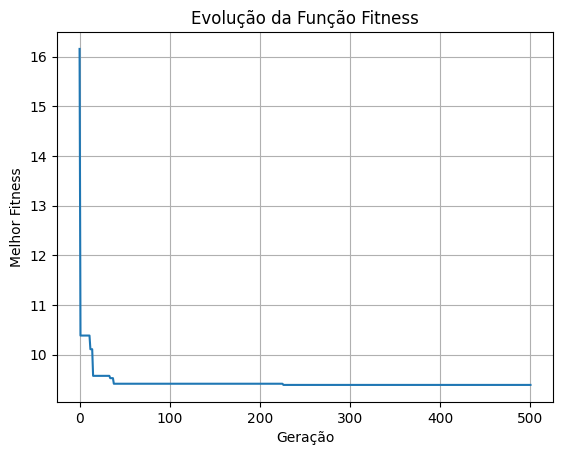

In [ ]:
all_best74 = []
all_fmin74 = []
all_conv_curve74 = []
# Definição da função objetivo com penalização
def fitness_function(ga_instance,solution, solution_idx):
    # constantes do problema
    l = 50
    rho = 0.3
    E = 30*10**6
    Px = 10
    Py = 25
    sig_esc = 30000
    b, d = solution

    objective = rho*d*b*l # Função objetivo

    # Penalização para restrições
    g1 = b - 2*d
    sig = (Py/(b*d)) + (6*Px*l)/(b*d**2)
    g2 = sig - sig_esc
    g3 = sig - (((np.pi**2)*E*d**2)/(48*l**2))
    g4 = 0.5 - b
    penalty = 0
    if g1 > 0:
        penalty += 100 * g1  # Penaliza violações da primeira restrição
    if g2 > 0:
        penalty += 100 * g2  # Penaliza violações da segunda restrição
    if g3 > 0:
        penalty += 100 * g3  # Penaliza violações da primeira restrição
    if g4 > 0:
        penalty += 100 * g4  # Penaliza violações da segunda restrição

    return -(objective + penalty)  # Negativo porque o pyGAD maximiza a função fitness

# Definições do GA
num_generations = 500
num_parents_mating = 15
sol_per_pop = 30
num_genes = 2
gene_space = [{'low': 0.5, 'high': 2}, {'low': 0.1, 'high': 2}]

for _ in range(50):
  ga_instance = pygad.GA(num_generations=num_generations,
                        num_parents_mating=num_parents_mating,
                        fitness_func=fitness_function,
                        sol_per_pop=sol_per_pop,
                        num_genes=num_genes,
                        gene_space=gene_space)

  # Executa o GA
  ga_instance.run()
  #ga_instance.plot_fitness()


  # Obtém a melhor solução
  solution, solution_fitness, _ = ga_instance.best_solution()
  fitness_values = ga_instance.best_solutions_fitness

  all_best74.append(solution)
  all_fmin74.append(solution_fitness)
  all_conv_curve74.append(fitness_values)

all_fmin74_array = np.array(all_fmin74)   #transforma em vetor
fmelhor74 = np.max(all_fmin74_array)      #pega o melhor resultado (valores negativos então tem que ser o max)
indice74 = np.argmax(all_fmin74_array)    #indice do melhor resultado
melhor_solucao74 = all_best74[indice74]   #ponto otimo da melhor solucao

fpior74 = np.min(all_fmin74_array)        #pior resultado
fmedia74 = np.mean(all_fmin74_array)      #media
fdesvpad74 = np.std(all_fmin74_array)     #desvio padrao
fitness_values74 = all_conv_curve74[indice74]  #curva da melhor solucao


print("\nSolucao para Algoritmo Genético")
print(f"Ponto Otimo: {melhor_solucao74}")
print(f"Melhor Solucao: {-1*fmelhor74}")
print(f"Pior Solucao: {-1*fpior74}")
print(f"Media: {-1*fmedia74}")
print(f"Desvio Padrao: {fdesvpad74}")

# Plota o gráfico manualmente
plt.plot(range(501),-1*np.array(fitness_values74), linestyle='-')
plt.xlabel('Geração')
plt.ylabel('Melhor Fitness')
plt.title('Evolução da Função Fitness')
plt.grid()
plt.show()


In [ ]:
np.savetxt("fitness_values74.txt", -1*np.array(fitness_values74))

## Problema 5

/usr/local/lib/python3.11/dist-packages/pygad/pygad.py:724: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(



Solucao para Algoritmo Genético
Ponto Otimo: [1.88052148 0.33625566 0.02720107 0.01      ]
Melhor Solucao: 0.9274560291199705
Pior Solucao: 1.354973266809394
Media: 1.0260437196426373
Desvio Padrao: 0.10299741620169192


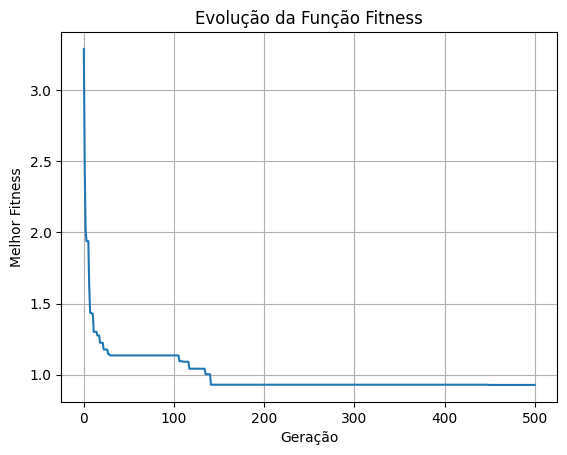

In [ ]:
all_best75 = []
all_fmin75 = []
all_conv_curve75 = []
# Definição da função objetivo com penalização
def fitness_function(ga_instance,solution, solution_idx):
    # constantes do problema
    h, b, tf, tw = solution
    L = 25; E = 210
    sigy = 262; siga = 144.1; taua = 86.46; sigt = 255/2
    Da = L/800; Pm = 104
    Ps = 155
    A = h*tw+2*b*tf
    I = ((1/12) * tw*h**3) + ((2/3)*b*tf**3) + 0.5*b*tf*h*(h+2*tf)
    w = (19+77*A)
    M = (L/8) * (2*Pm + w*L)
    sig = (M/(1000*I)) * (0.5*h + tf)
    sigf = 72845*((tf/b)**2)
    sigw = 3648276*((tw/h)**2)
    S = 0.5*(Ps + w*L)
    D = ((L**3)/(384*(10**6)*E*I)) * (8*Pm + 5*w*L)
    tau = S/(1000*h*tw)

    objective = A*L # Função objetivo

    # Penalização para restrições
    g1 = sig-siga
    g2 = sig-sigf
    g3 = sig-sigw
    g4 = tau-taua
    g5 = D-Da
    g6 = sig-sigt
    penalty = 0
    if g1 > 0:
        penalty += 100000 * g1  # Penaliza violações da primeira restrição
    if g2 > 0:
        penalty += 100000 * g2  # Penaliza violações da segunda restrição
    if g3 > 0:
        penalty += 100000 * g3  # Penaliza violações da primeira restrição
    if g4 > 0:
        penalty += 100000 * g4  # Penaliza violações da segunda restrição
    if g5 > 0:
        penalty += 100000 * g5  # Penaliza violações da segunda restrição
    if g6 > 0:
        penalty += 100000 * g6  # Penaliza violações da segunda restrição
    return -(objective + penalty)  # Negativo porque o pyGAD maximiza a função fitness

# Definições do GA
num_generations = 500
num_parents_mating = 15
sol_per_pop = 30
num_genes = 4
gene_space = [{'low': 0.3, 'high': 2.5},{'low': 0.3, 'high': 2.5} ,{'low': 0.01, 'high': 0.1},{'low': 0.01, 'high': 0.1}]

for _ in range(50):
  ga_instance = pygad.GA(num_generations=num_generations,
                        num_parents_mating=num_parents_mating,
                        fitness_func=fitness_function,
                        sol_per_pop=sol_per_pop,
                        num_genes=num_genes,
                        gene_space=gene_space)

# Executa o GA
  ga_instance.run()
  #ga_instance.plot_fitness()


  # Obtém a melhor solução
  solution, solution_fitness, _ = ga_instance.best_solution()
  fitness_values = ga_instance.best_solutions_fitness

  all_best75.append(solution)
  all_fmin75.append(solution_fitness)
  all_conv_curve75.append(fitness_values)

all_fmin75_array = np.array(all_fmin75)   #transforma em vetor
fmelhor75 = np.max(all_fmin75_array)      #pega o melhor resultado (valores negativos então tem que ser o max)
indice75 = np.argmax(all_fmin75_array)    #indice do melhor resultado
melhor_solucao75 = all_best75[indice75]   #ponto otimo da melhor solucao

fpior75 = np.min(all_fmin75_array)        #pior resultado
fmedia75 = np.mean(all_fmin75_array)      #media
fdesvpad75 = np.std(all_fmin75_array)     #desvio padrao
fitness_values75 = all_conv_curve75[indice75]  #curva da melhor solucao


print("\nSolucao para Algoritmo Genético")
print(f"Ponto Otimo: {melhor_solucao75}")
print(f"Melhor Solucao: {-1*fmelhor75}")
print(f"Pior Solucao: {-1*fpior75}")
print(f"Media: {-1*fmedia75}")
print(f"Desvio Padrao: {fdesvpad75}")

# Plota o gráfico manualmente
plt.plot(range(501),-1*np.array(fitness_values75), linestyle='-')
plt.xlabel('Geração')
plt.ylabel('Melhor Fitness')
plt.title('Evolução da Função Fitness')
plt.grid()
plt.show()

In [ ]:
np.savetxt("fitness_values75.txt", -1*np.array(fitness_values75))

In [ ]:
aaaa = -1*np.array(fitness_values75)
aaaa[:40]

array([3.29152874, 2.46077608, 2.02002907, 1.9393625 , 1.9393625 ,
       1.9393625 , 1.61690531, 1.43480745, 1.43480745, 1.42919052,
       1.42919052, 1.30130361, 1.30130361, 1.30130361, 1.30130361,
       1.27577157, 1.27577157, 1.27577157, 1.22391198, 1.22391198,
       1.22391198, 1.22391198, 1.17668779, 1.17668779, 1.17668779,
       1.17668779, 1.17668779, 1.14416619, 1.14416619, 1.13509566,
       1.13509566, 1.13509566, 1.13509566, 1.13509566, 1.13509566,
       1.13509566, 1.13509566, 1.13509566, 1.13509566, 1.13509566])